Nombre: Mario Calderón


In [123]:
import camb
import numpy as np
import matplotlib.pyplot as plt
import scienceplots 
from scipy.integrate import odeint


# P5

Con lo obtenido en la tarea, podemos seguir la **evolución** de $\delta$ y de $\theta$ en función del factor de escala. Las condiciones iniciales que usaremos son:


$
\delta(10^{-4}) = 10^{-3},
\qquad
\theta(10^{-4}) = 0
$

In [124]:
H0 = 67 # km/s/Mpc
omega_m = 0.3
omega_r=10**-4
# Asumimos que no hay curvatura
omega_de=1-omega_r-omega_r

delta_de=10**-3

In [125]:
def EDO(vect,a ,k):
    delta=vect[0]
    theta=vect[1]

    H = H0 * np.sqrt(omega_m * a**-3 + omega_r * a**-4 + omega_de)

    ec = np.array([-(2*k**2+9*a**2*H**2)**-1 *(2*k**2*theta/(a**2*H) - 27/2*a**3*H**2/k**2*(theta/a + 3/2*H*(delta+ 3*theta/k**2*a*H)+ delta_de)),-theta/a - 3/2 *H *((delta + 3*theta/k**2*a*H) + delta_de)])

    return ec

In [126]:
delta0 = 10**-3
theta0 = 0

y0 = np.array([delta0,theta0])

a = np.linspace(10**-4 ,1 , 10000)

k1 = 10**-3 * H0
k2 = 10**-1 * H0
k3 = H0
k4 = 50 * H0


sol1=odeint(EDO, y0, t=a, args=(k1,))
sol2=odeint(EDO, y0, t=a, args=(k2,))
sol3=odeint(EDO, y0, t=a, args=(k3,))
sol4=odeint(EDO, y0, t=a, args=(k4,))

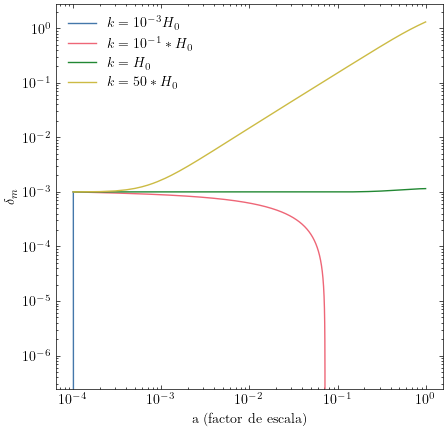

In [127]:
plt.figure(figsize=(5,5))
plt.loglog(a, sol1[:,0], label='$k=10^{-3}H_0$')
plt.loglog(a, sol2[:,0], label='$k=10^{-1}*H_0$')
plt.loglog(a, sol3[:,0], label='$k=H_0$')
plt.loglog(a, sol4[:,0], label='$k=50*H_0$')
plt.xlabel('a (factor de escala)')
plt.ylabel('$\delta_m$')
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

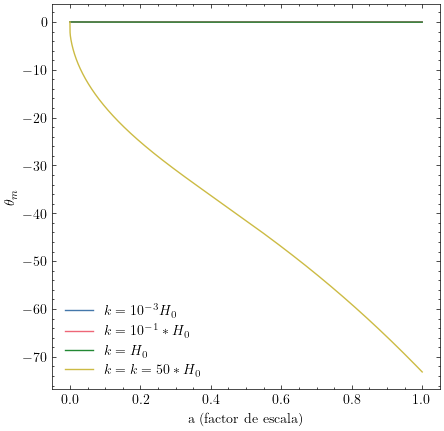

In [128]:
plt.figure(figsize=(5,5))
plt.plot(a, sol1[:,1], label='$k=10^{-3}H_0$')
plt.plot(a, sol2[:,1], label='$k=10^{-1}*H_0$')
plt.plot(a, sol3[:,1], label='$k=H_0$')
plt.plot(a, sol4[:,1], label='$k=k=50*H_0$')
plt.xlabel('a (factor de escala)')
plt.ylabel(r'$\theta_m$')
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

Las perturbaciones con $k$ pequeño (escalas grandes) se **“activan” más tarde**, porque **entran en el horizonte causal** después que las perturbaciones de **escalas pequeñas**.

Además, en la época actual muchas perturbaciones **evolucionan al régimen no lineal**. En esas condiciones se requieren **ecuaciones distintas** a las de teoría lineal; por tanto, la solución lineal **deja de ser válida** para esos valores grandes de $\delta$. Aun así, el análisis lineal **sigue siendo una guía cualitativa** útil para entender la evolución de las perturbaciones.


# P6

## Matter power spectrum

In [129]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

z_max=5000
z_min=0

# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [130]:
redshifts=np.arange(z_min,z_max,z_max//5)

redshifts

# Set Matter Power Spectrum

pars.set_matter_power(redshifts=redshifts, kmax=1) # Grandes escalas 

results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


### Linear matter power spectrum


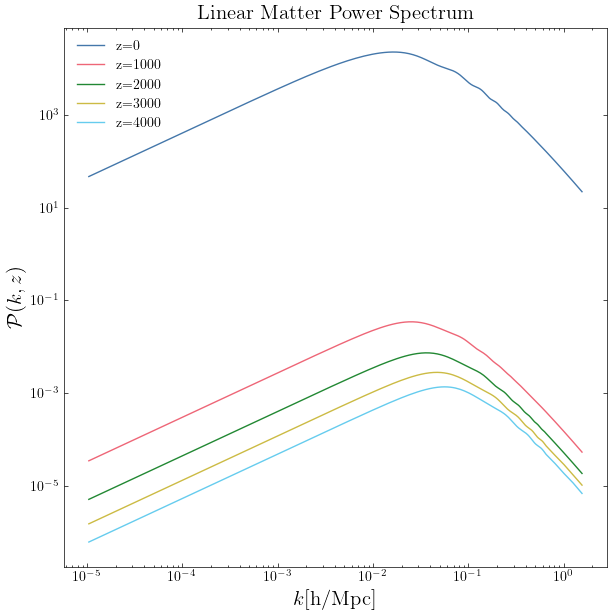

In [131]:
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

plt.figure(figsize=(7,7))
plt.loglog(kh,PK[0,:],label='z=' + str(redshifts[0]))
plt.loglog(kh,PK[1,:],label='z=' + str(redshifts[1]))
plt.loglog(kh,PK[2,:],label='z=' + str(redshifts[2]))
plt.loglog(kh,PK[3,:],label='z=' + str(redshifts[3]))
plt.loglog(kh,PK[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

### Non lineal matter power spectrum

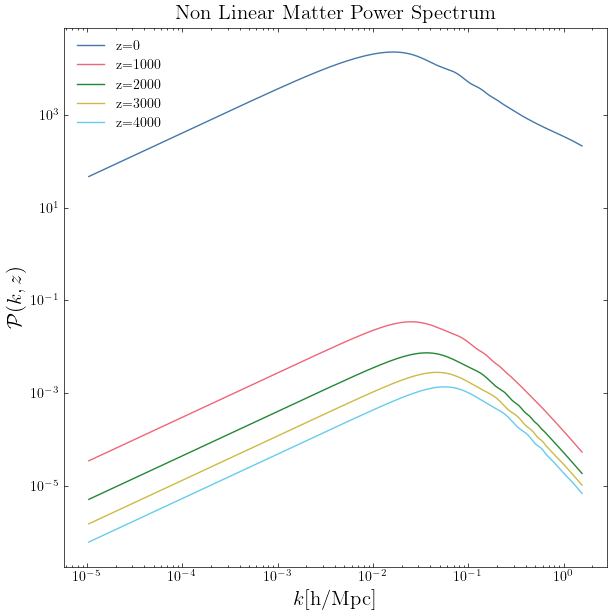

In [132]:
khnl, znl, PKnl = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True,nonlinear=True)


plt.figure(figsize=(7,7))
plt.loglog(khnl,PKnl[0,:],label='z=' + str(redshifts[0]))
plt.loglog(khnl,PKnl[1,:],label='z=' + str(redshifts[1]))
plt.loglog(khnl,PKnl[2,:],label='z=' + str(redshifts[2]))
plt.loglog(khnl,PKnl[3,:],label='z=' + str(redshifts[3]))
plt.loglog(khnl,PKnl[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

### Comparación del lineal con el no lineal

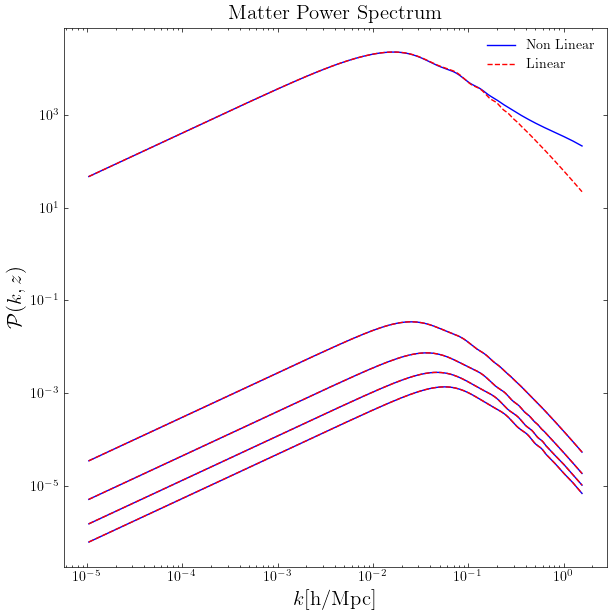

In [133]:
plt.figure(figsize=(7,7))
plt.loglog(khnl,PKnl[0,:],label='Non Linear',c='blue')
plt.loglog(khnl,PKnl[1,:],c='blue')
plt.loglog(khnl,PKnl[2,:],c='blue')
plt.loglog(khnl,PKnl[3,:],c='blue')
plt.loglog(khnl,PKnl[4,:],c='blue')
plt.loglog(kh,PK[0,:],c='red' ,linestyle='dashed', label='Linear')
plt.loglog(kh,PK[1,:],c='red' ,linestyle='dashed')
plt.loglog(kh,PK[2,:],c='red',linestyle='dashed')
plt.loglog(kh,PK[3,:],c='red',linestyle='dashed')
plt.loglog(kh,PK[4,:],c='red',linestyle='dashed')
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

### Ahora veamos lo que sucede si los neutrinos los ponemos como 0

In [134]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, mnu=0, num_massive_neutrinos=0) # Omega_nu=0

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.0
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 3.044
 num_nu_massive = 0
 nu_mass_eigenstates = 0
 share_delta_neff = False
 nu_mass_degeneracies = []
 nu_mass_fractions = []
 nu_mass_numbers = []
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 0.0
   nrunrun = 0.0
   nt = -0.0
   ntrun = -0.0
  

In [135]:
pars.set_matter_power(redshifts=redshifts, kmax=1)  

results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


### Linear matter power spectrum


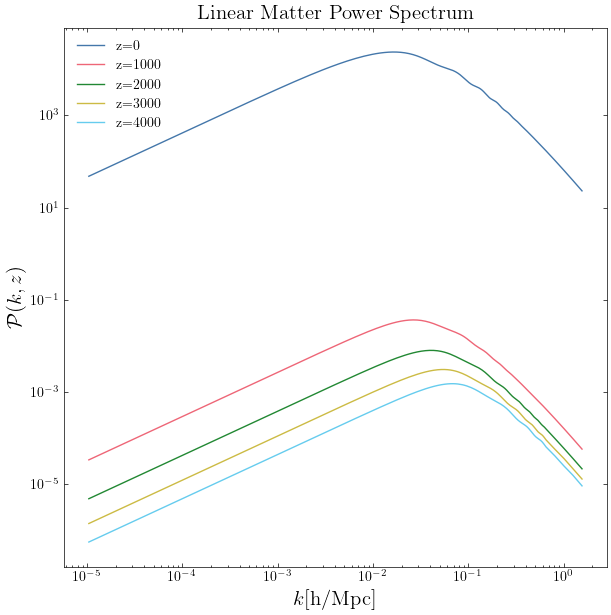

In [136]:
khn, zn, PKn=results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

plt.figure(figsize=(7,7))
plt.loglog(khn, PKn[0,:], label='z=' + str(redshifts[0]))
plt.loglog(khn, PKn[1,:], label='z=' + str(redshifts[1]))
plt.loglog(khn, PKn[2,:], label='z=' + str(redshifts[2]))
plt.loglog(khn, PKn[3,:], label='z=' + str(redshifts[3]))
plt.loglog(khn, PKn[4,:], label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

### No linear matter power spectrum


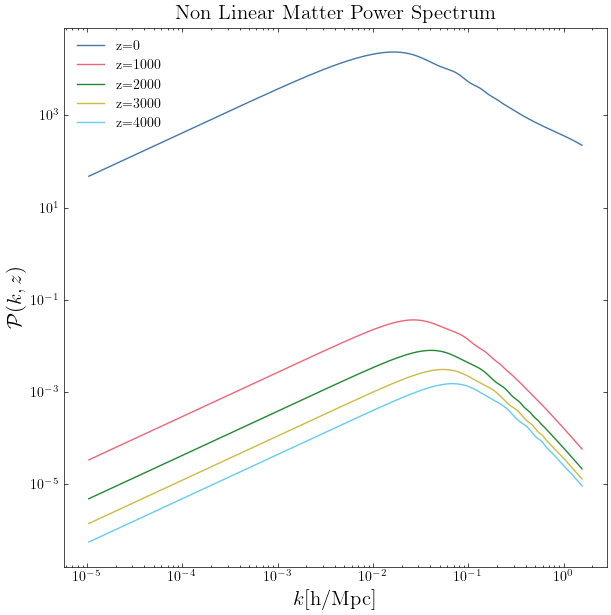

In [137]:
khnln, znln, PKnln = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True,nonlinear=True)


plt.figure(figsize=(7,7))
plt.loglog(khnln, PKnln[0,:], label='z=' + str(redshifts[0]))
plt.loglog(khnln, PKnln[1,:], label='z=' + str(redshifts[1]))
plt.loglog(khnln, PKnln[2,:], label='z=' + str(redshifts[2]))
plt.loglog(khnln, PKnln[3,:], label='z=' + str(redshifts[3]))
plt.loglog(khnln, PKnln[4,:], label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()


### Comparamos el lineal con el no lineal

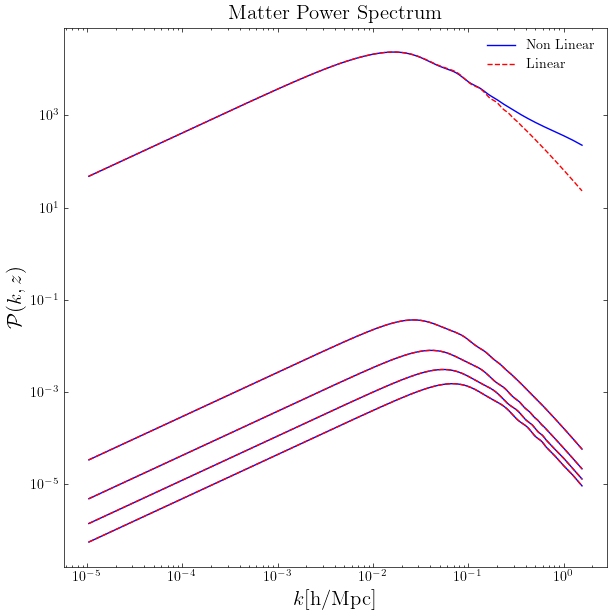

In [138]:
plt.figure(figsize=(7,7))
plt.loglog(khnln,PKnln[0,:],label='Non Linear',c='blue')
plt.loglog(khnln,PKnln[1,:],c='blue')
plt.loglog(khnln,PKnln[2,:],c='blue')
plt.loglog(khnln,PKnln[3,:],c='blue')
plt.loglog(khnln,PKnln[4,:],c='blue')
plt.loglog(khn,PKn[0,:],c='red' ,linestyle='dashed', label='Linear')
plt.loglog(khn,PKn[1,:],c='red' ,linestyle='dashed')
plt.loglog(khn,PKn[2,:],c='red',linestyle='dashed')
plt.loglog(khn,PKn[3,:],c='red',linestyle='dashed')
plt.loglog(khn,PKn[4,:],c='red',linestyle='dashed')
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

Para visualizar con mayor claridad el impacto de los neutrinos masivos en el *matter power spectrum*, compararemos ambos espectros tomando su cociente.

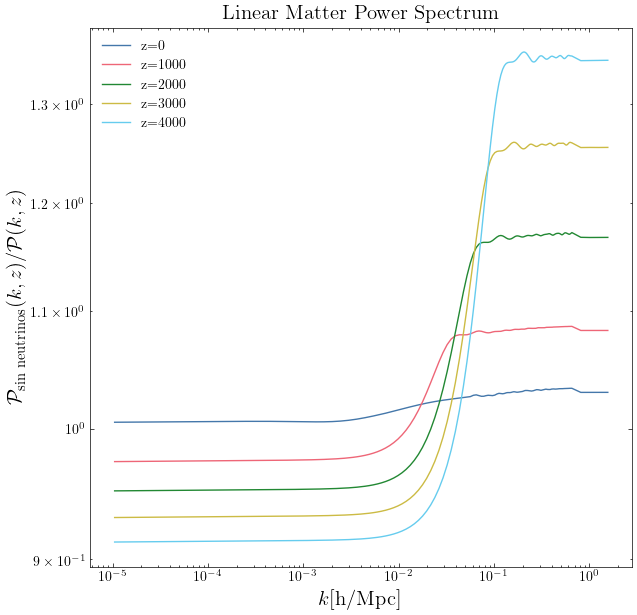

In [139]:
plt.figure(figsize=(7,7))
plt.loglog(khn,PKn[0,:]/PK[0,:],label='z=' + str(redshifts[0]))
plt.loglog(khn,PKn[1,:]/PK[1,:],label='z=' + str(redshifts[1]))
plt.loglog(khn,PKn[2,:]/PK[2,:],label='z=' + str(redshifts[2]))
plt.loglog(khn,PKn[3,:]/PK[3,:],label='z=' + str(redshifts[3]))
plt.loglog(khn,PKn[4,:]/PK[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel(r'$\mathcal{P}_{\text{sin neutrinos}}(k,z)/\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

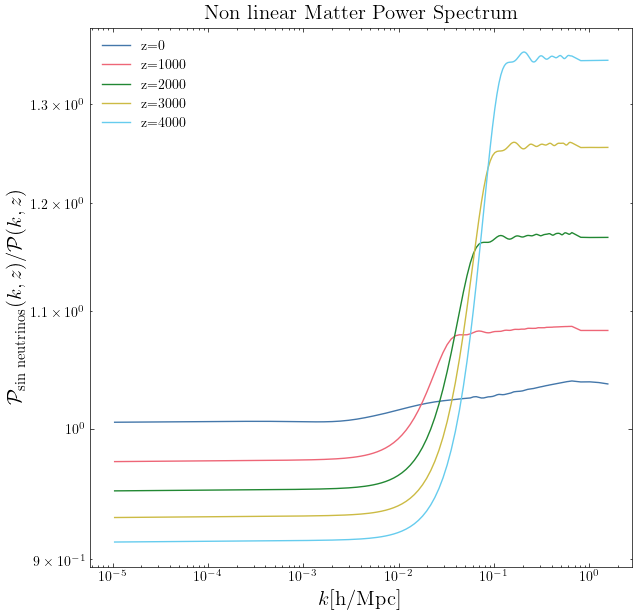

In [140]:
plt.figure(figsize=(7,7))
plt.loglog(khnln,PKnln[0,:]/PKnl[0,:],label='z=' + str(redshifts[0]))
plt.loglog(khnln,PKnln[1,:]/PKnl[1,:],label='z=' + str(redshifts[1]))
plt.loglog(khnln,PKnln[2,:]/PKnl[2,:],label='z=' + str(redshifts[2]))
plt.loglog(khnln,PKnln[3,:]/PKnl[3,:],label='z=' + str(redshifts[3]))
plt.loglog(khnln,PKnln[4,:]/PKnl[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel(r'$\mathcal{P}_{\text{sin neutrinos}}(k,z)/\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

Notamos que el impacto de los neutrinos masivos en el *matter power spectrum* se manifiesta **principalmente en las escalas pequeñas** ($k$ grande). Además, este efecto se intensifica a altos *redshifts*.

La explicación es que, al desacoplarse del baño térmico, los neutrinos liberan su movimiento y pueden escapar de las regiones sobredensas hacia zonas de menor densidad. Esto provoca una modificación del espectro: se incrementa la potencia en escalas pequeñas ($k$ grande) y se reduce en escalas grandes ($k$ pequeño).

In [141]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
tau = 0.054
omk=0

# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

### Variaremos el parametro de curvatura

### omk-0.07

In [142]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk - 0.07, tau=tau)

power1 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL1=power1['unlensed_scalar']


### omk-0.03

In [143]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk - 0.03, tau=tau)

power2 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL2=power2['unlensed_scalar']

### omk

In [144]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk , tau=tau)

power3 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL3=power3['unlensed_scalar']

### omk+0.03

In [145]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk + 0.03, tau=tau)

power4 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL4=power4['unlensed_scalar']


### omk+0.07

In [146]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk + 0.07, tau=tau)

power5 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL5=power5['unlensed_scalar']

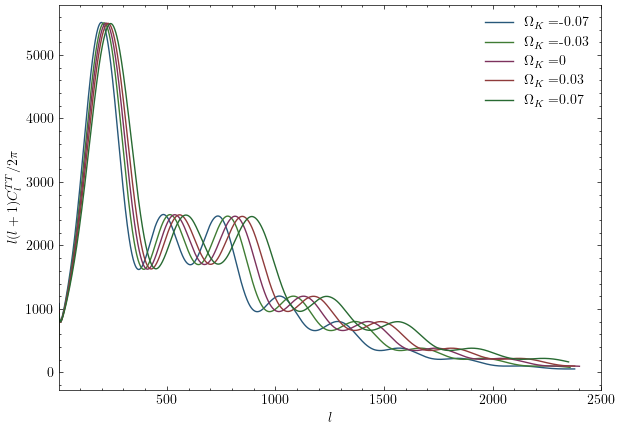

In [147]:
ells1=np.arange(unlensedCL1[:,0].shape[0])
ells2=np.arange(unlensedCL2[:,0].shape[0])
ells3=np.arange(unlensedCL3[:,0].shape[0])
ells4=np.arange(unlensedCL4[:,0].shape[0])
ells5=np.arange(unlensedCL5[:,0].shape[0])

colors = ["#28587A", "#407c34", "#7d325d", "#8f3b3b", "#286a32"] 

plt.figure(figsize=(7,5))
plt.plot(ells1, unlensedCL1[:,0], color=colors[0], label='$\Omega_K=$' + str(omk-0.07))
plt.plot(ells2, unlensedCL2[:,0], color=colors[1], label='$\Omega_K=$' + str(omk-0.03))
plt.plot(ells3, unlensedCL3[:,0], color=colors[2], label='$\Omega_K=$' + str(omk))
plt.plot(ells4, unlensedCL4[:,0], color=colors[3], label='$\Omega_K=$' + str(omk+0.03))
plt.plot(ells5, unlensedCL5[:,0], color=colors[4], label='$\Omega_K=$' + str(omk+0.07))
plt.legend()
plt.style.use(['science', 'bright'])
plt.xlim(2, 2500)
plt.ylabel('$l(l+1)C_l^{TT}/2\pi$')
plt.xlabel('$l$')
plt.show()



Al aumentar el parámetro de curvatura, los peaks se desplazan hacia la derecha (a multipolos más altos ($\ell$)), es decir, hacia escalas angulares más pequeñas. Esto es coherente con que un universo más abierto presenta geodésicas divergentes: las separaciones angulares aparentes entre perturbaciones en la **LSS** disminuyen en comparación con un universo euclídeo.

De manera inversa, en un universo cerrado las geodésicas convergen, aumentando la separación angular aparente y desplazando los peaks hacia multipolos menores. Así se interpretan los power spectrum obtenidos.


### omega_bh2-0.004

In [148]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.004, omch2=omega_ch2, omk=omk, tau=tau)

power1 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL1=power1['unlensed_scalar']

### omega_bh2-0.01

In [149]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.01, omch2=omega_ch2, omk=omk, tau=tau)

power2 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL2=power2['unlensed_scalar']


### omega_bh2

In [150]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk, tau=tau)

power3 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL3=power3['unlensed_scalar']

### omega_bh2+0.005

In [151]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.005, omch2=omega_ch2, omk=omk, tau=tau)

power4 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL4=power4['unlensed_scalar']

### omega_bh2+0.01

In [152]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.01, omch2=omega_ch2, omk=omk, tau=tau)

power5 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL5=power5['unlensed_scalar']

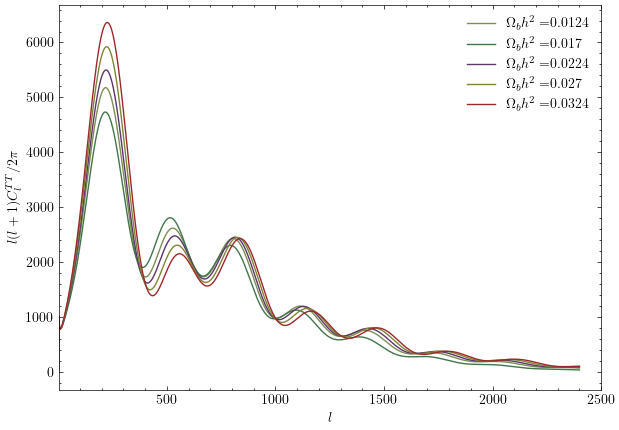

In [153]:
ells1=np.arange(unlensedCL1[:,0].shape[0])
ells2=np.arange(unlensedCL2[:,0].shape[0])
ells3=np.arange(unlensedCL3[:,0].shape[0])
ells4=np.arange(unlensedCL4[:,0].shape[0])
ells5=np.arange(unlensedCL5[:,0].shape[0])

colors = ["#7c8d55", "#41764c", "#5c366b", "#7f8535", "#9a2a2a"] 

plt.figure(figsize=(7,5))

plt.plot(ells1, unlensedCL1[:,0], color=colors[0], label='$\Omega_bh^2=$' + str(omega_bh2-0.01))
plt.plot(ells2, unlensedCL2[:,0], color=colors[1], label='$\Omega_bh^2=$' + str(round(omega_bh2-0.005,3)))
plt.plot(ells3, unlensedCL3[:,0], color=colors[2], label='$\Omega_bh^2=$' + str(omega_bh2))
plt.plot(ells4, unlensedCL4[:,0], color=colors[3], label='$\Omega_bh^2=$' + str(round(omega_bh2+0.005,3)))
plt.plot(ells5, unlensedCL5[:,0], color=colors[4], label='$\Omega_bh^2=$' + str(omega_bh2+0.01))
plt.legend()
plt.style.use(['science', 'bright'])
plt.xlim(2, 2500)
plt.ylabel('$l(l+1)C_l^{TT}/2\pi$')
plt.xlabel('$l$')
plt.show()

Al variar la fracción bariónica, los peaks cambian tanto de posición como de intensidad. Un primer efecto claro es la amplificación del primer peak $\Omega_b h^2$.

Al incrementar $\Omega_b h^2$, los peaks se desplazan hacia la derecha (a multipolos mayores, ( $\ell$ ), es decir, a escalas más pequeñas). Esto ocurre porque $\Omega_b$ está ligado a la velocidad del sonido del plasma y, por ende, a la frecuencia de las oscilaciones: al aumentar $\Omega_b h^2$, disminuye la velocidad del sonido y baja la frecuencia, moviendo los peaks a valores más altos de $\ell$.

El primer peak crece con $\Omega_b h^2$ porque una mayor densidad bariónica favorece un colapso gravitacional más intenso en las compresiones. En cambio, el segundo peak (asociado a una rarefacción) se atenúa: con más bariones, la materia tiende a colapsar con mayor rapidez, oponiéndose a la rarefacción y reduciendo su amplitud.


### omega_bh2-0.005, omega_ch2-0.05

In [154]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.005, omch2=omega_ch2-0.05, omk=omk, tau=tau)

power1 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL1=power1['unlensed_scalar']

### omega_bh2-0.0025, omega_ch2-0.025

In [155]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.0025, omch2=omega_ch2-0.025, omk=omk, tau=tau)

power2 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL2=power2['unlensed_scalar']

### omega_bh2, omega_ch2

In [156]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk, tau=tau)

power3 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL3=power3['unlensed_scalar']

### omega_bh2+0.0025, omega_ch2+0.025

In [157]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.0025, omch2=omega_ch2+0.025, omk=omk, tau=tau)

power4 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL4=power4['unlensed_scalar']

### omega_bh2+0.005, omega_ch2+0.05

In [158]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.005, omch2=omega_ch2+0.05, omk=omk, tau=tau)

power5 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL5=power5['unlensed_scalar']

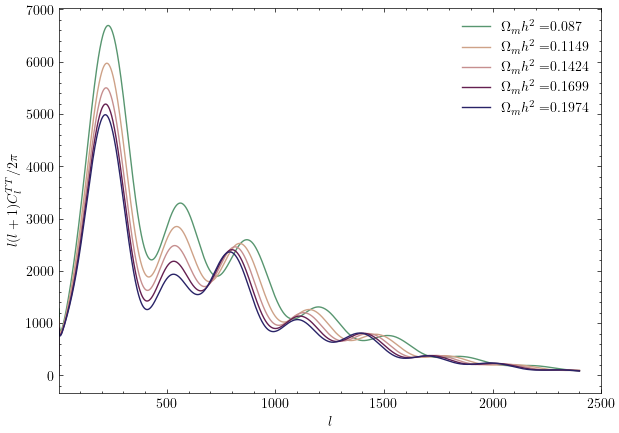

In [159]:
ells1 = np.arange(unlensedCL1[:,0].shape[0])
ells2 = np.arange(unlensedCL2[:,0].shape[0])
ells3 = np.arange(unlensedCL3[:,0].shape[0])
ells4 = np.arange(unlensedCL4[:,0].shape[0])
ells5 = np.arange(unlensedCL5[:,0].shape[0])

colors = ["#589670", "#cea288", "#c68f8f", "#652051", "#292367"] 

plt.figure(figsize=(7,5))

plt.plot(ells1, unlensedCL1[:,0], color=colors[0], label=r'$\Omega_mh^2=$' + str(round(omega_bh2+omega_ch2-0.055,3)))
plt.plot(ells2, unlensedCL2[:,0], color=colors[1], label=r'$\Omega_mh^2=$' + str(omega_bh2+omega_ch2-0.0275))
plt.plot(ells3, unlensedCL3[:,0], color=colors[2], label=r'$\Omega_mh^2=$' + str(omega_bh2+omega_ch2))
plt.plot(ells4, unlensedCL4[:,0], color=colors[3], label=r'$\Omega_mh^2=$' + str(omega_bh2+omega_ch2+0.0275))
plt.plot(ells5, unlensedCL5[:,0], color=colors[4], label=r'$\Omega_mh^2=$' + str(omega_bh2+omega_ch2+0.055))
plt.legend()
plt.style.use(['science', 'bright'])
plt.xlim(2, 2500)
plt.ylabel('$l(l+1)C_l^{TT}/2\pi$')
plt.xlabel('$l$')
plt.show()

Al incrementar la densidad de materia, los picos del espectro de potencia angular se atenúan. Esto se explica porque la materia siente un potencial gravitatorio más profundo, lo que reduce la amplitud de las oscilaciones acústicas bariónicas (BAO).

Un aumento de la densidad de materia conduce a una amortiguación de los peaks en el angular power spectrum. La razón es el incremento del potencial gravitacional efectivo sobre la materia, que debilita las BAO y, en consecuencia, disminuye su contraste en el espectro.

A densidades de materia más altas, los picos del espectro de potencia angular aparecen más apagados. El mayor potencial gravitatorio que experimenta la materia suprime parcialmente las BAO, reduciendo su prominencia en las escalas observadas.